# **딥러닝팀 클린업 1주차 코딩 실습**

> Produced by 김예찬 (feat. 구글링, 지멘)

## **0. Colab이란?**

---
> Colab은 구글에서 제공하는 클라우드 기반 무료 Jupyter Notebook 개발 환경입니다. 

> 대용량 이미지 데이터 등을 사용하며 행렬 계산이 주를 이루는 딥러닝 모델의 경우 복잡한 연산을 위한 적은 수의 코어를 바탕으로 한 CPU보다는 단순한 행렬 연산을 위한 많은 수의 코어를 기반으로 한 GPU의 성능이 학습 속도를 좌우합니다. 안타깝게도, 안 그래도 비싼 GPU는 비트코인 열풍으로 그 가격이 나날이 치솟는 중입니다...때문에, 우리처럼 딥러닝에 입문하는 사람들이 GPU를 사는 것은 부담이 매우 큽니다.

> Colab은 구글에서 제공하는 클라우드를 기반으로 하기 때문에, 구글이 제공하는 양질의 GPU를 사용할 수 있으며, 모든 프로그램은 구글의 서버에서 돌아갑니다. 일반적인 노트북의 경우 딥러닝에 사용할 수 있는 GPU가 장착되어 있지 않은 경우가 많으며, 장착되어야 있다고 해도 개발 속도를 유의미하게 빠르게 해줄 만큼 뛰어난 GPU가 아닌 경우가 많으며, 대다수의 경우 애초에 딥러닝에 사용할 수 없는 GPU입니다.

> 따라서, 딥러닝을 입문하는 입장에서 Colab은 필수적으로 익숙해져야 할 개발 환경입니다!
---


### **0-1) GPU 사용 현황**

그럼 도대체 얼마나 좋은 GPU를 제공하길래 Colab 사용을 강력하게 권장하는 것인지 확인해보겠습니다! 아래의 단계에 따라 Colab에서 GPU를 사용할 수 있도록 환경을 세팅하겠습니다.



1.   좌측 상단 '런타임' 클릭
2.   '런타임 유형 변경' 클릭
3.   '하드웨어 가속기' - 'GPU' 선택 후 저장
4.   우측 상단 '연결' 클릭(3번을 끝내면 자동으로 됩니다!)



In [ ]:
# GPU 사용 현황 확인 - Window 환경에서도 동일한 코드로 확인 가능

! nvidia-smi

Tue Sep 13 12:45:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Colab 일반 기준 Tesla T4라는 GPU가 적용되어 있고, 가운데 셀을 보면 (0MiB / 15109MiB)라고 되어있는 것으로 보아 총 용량 약 15GB 중 아직 전혀 사용하지 않고 있음을 확인할 수 있습니다. 추후 딥러닝 모델을 직접 돌릴 때 자주 활용하게 될 코드이니, 기억해두면 좋습니다.

### **0-2) Drive Mount**

---
> 딥러닝 모델을 돌리려면 이미지, 텍스트 등 데이터를 불러와서 모델에 입력하게 됩니다. 즉, 이미지나 텍스트를 불러와야 하는데, Colab은 클라우드 기반이기 때문에 로컬 환경(노트북 등)의 데이터를 불러올 수 없습니다.

> 따라서, 우리는 구글 드라이브에 필요한 파일을 업로드한 후, 구글 드라이브에 '마운트(Mount)'하여 원하는 데이터를 불러올 수 있습니다. Colab에서 새로운 노트북 파일을 열거나 작성할 때, 가장 먼저 드라이브에 마운트하는 습관을 들이면 좋습니다!

> 추가적으로, R의 setwd(), getwd()와 비슷하게 working directory를 쉽게 관리하도록 도와주는 'os' 라이브러리를 불러와 working directory를 필요한 파일이 있는 경로로 변경하겠습니다.
---


In [ ]:
# Drive Mount

from google.colab import drive
drive.mount('/content/gdrive')

# Working Directory 변경

import os

directory = "2022PSAT/[딥러닝팀]클린업 1주차 코딩 실습" # 파일이 있는 디렉토리
path = "/content/gdrive/My Drive/" + directory
os.chdir(path)

Mounted at /content/gdrive


### **0-3) 시드 고정**

In [ ]:
import random
import numpy as np

def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
random_state = 42
seed_everything(random_state)

## **1. 패키지 불러오기**

---
> 이번 1주차 코딩 실습에서는 Tensorflow와 Pytorch를 활용한 아주 간단한 딥러닝 모델을 구현해 볼 예정입니다. 따라서 Tensorflow와 Pytorch를 사용하기 위해서 필요한 패키지들을 불러오도록 하겠습니다.
---


### **1-1) Tensorflow 패키지**


In [ ]:
import tensorflow as tf      # Tensorflow 패키지 불러오기
from tensorflow.keras.models import Sequential # Tensorflow의 Sequential 모델 불러오기
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Flatten, Activation


---
> Tensorflow에는 딥러닝을 만드는 3가지 방법이 있습니다.


> 1. Sequential 모델

> Sequential 모델은 가장 구현하기 쉬운 방법으로, 원하는 layer를 순차적으로 add하는 방법입니다. 이 방법은 직관적으로 빠르게 모델을 구현할 수 있지만, 구조가 조금 복잡해지면 구현하기 힘들 수 있다는 단점이 있습니다.

> 2. Functional 모델

> input layer부터 output layer까지 직접 forward 순서대로 함수 끝에 입력 변수를 넣어주는 방법입니다. 최종적으로는 Model(inputs, outputs) 과 같이 입력 layer와 출력 layer를 지정해 줌으로써 모델을 만들 수 있습니다.

> 3. Subclassing 모델

> 직접 모델 클래스를 생성하고 Model 모듈을 상속 받는 방법입니다. 그리고 __init__함수에는 사용할 layer들을 작성하고, call함수에는 init에서 작성한 layer에 맞게 forward 해 줍니다. 이 방법은 Pytorch와 방법이 매우 비슷하다고 볼 수 있습니다.

> 오늘은 매우 간단한 모델을 구현할 것이기 때문에, 이 3가지 방법 중 Sequential 모델로 구현해보도록 하겠습니다.
---


















### **1-2) Pytorch 패키지**

In [ ]:
import torch    # Pytorch 패키지 불러오기
import torch.nn as nn    # 여기서 nn은 Neural Network, 즉 신경망을 의미합니다!
import torchvision.datasets as datasets
import torchvision.transforms as transforms

---


> torchvision은 Pytorch의 패키지 중 하나로 인기 있는 dataset, 모델 및 컴퓨터 비전을 위한 common image transformation으로 구성되어 있습니다.

> 여기서 transforms은 데이터가 학습에 적합하도록 처리하는 과정을 말합니다!
---





### **1-3) 시각화 패키지**

In [ ]:
import matplotlib.pyplot as plt

## **2. Tensorflow**

### **2-1) 데이터 불러오기**

---
> MNIST는 간단한 컴퓨터 비전 데이터셋입니다. Mnist는 손으로 쓰여진 이미지와 그 라벨로 구성되어 있습니다.

> 1주차에서 해볼 실습은 이 MNIST를 사용하여 모델이 이미지를 보고 어떤 숫자인지 예측하는 모델을 훈련시키는 것입니다.

> Tensorflow 패키지와 Pytorch 패키지에 모두 MNIST 데이터셋이 있기 때문에 각각 불러와보도록 하겠습니다!
---



In [ ]:
train, test = tf.keras.datasets.mnist.load_data(
 path='mnist.npz'
) 

11501568/11490434 [==============================] - 0s 0us/step


### **2-2) 데이터 시각화**

In [ ]:
image=train[0][0]
image.shape

(28, 28)

<function matplotlib.pyplot.show(*args, **kw)>

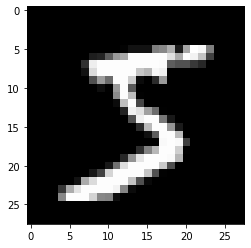

In [ ]:
plt.imshow(image,'gray')
plt.show

In [ ]:
train[1][0]    # 라벨 확인

5

### **2-3) 모델 구현**

In [ ]:
model = Sequential()     # Sequential 모델 사용
model.add(Flatten())     # 행렬 형태를 벡터 형태로 변환
model.add(Dense(256, kernel_initializer='he_normal', bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(256, kernel_initializer='he_normal', bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax', kernel_initializer='he_normal',
bias_initializer='zeros'))   # 왜 마지막 Dense층의 output이 10이고, 활성화 함수로는 softmax를 사용했을까요?
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(train[0], train[1], epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.2035 - accuracy: 0.9383
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0975 - accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0711 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0567 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0466 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0398 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0337 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0297 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0254 - accuracy: 0.9914
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.02

---
> Epoch를 10으로 설정해서 돌린 결과 꽤 높은 정확도를 확인할 수 있었습니다! 매우 간단한 모델이니 위 코드들을 하나하나 뜯어서 살펴보면서 왜 이렇게 모델을 구성했는지 고민해보셨으면 좋겠습니다!
---

## **3. Pytorch**

### **3-1) 데이터 불러오기**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # gpu 사용 옵션
train = datasets.MNIST(root='MNIST_data/', train=True,
transform=transforms.ToTensor(), download=True)
test = datasets.MNIST(root='MNIST_data/', train=False,
transform=transforms.ToTensor(), download=True)
data_loader = torch.utils.data.DataLoader(dataset = train, batch_size=32,
shuffle=True, drop_last=True) 

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



---
> Torch 패키지의 dataset을 사용하여 MNIST데이터셋을 불러오고, dataloader을 이용하여 배치사이트 형태로 만들어서 우리가 실제로 학습할 때 이용할 수 있게 형태를 만들어주었습니다.
---

### **3-2) 모델 구현**

In [ ]:
linear1 = nn.Linear(784, 256, bias=True)
linear2 = nn.Linear(256, 256, bias=True)
linear3 = nn.Linear(256, 10, bias=True)
relu = nn.ReLU()
batch1 = nn.BatchNorm1d(256)
batch2 = nn.BatchNorm1d(256)
nn.init.kaiming_normal_(linear1.weight)
nn.init.kaiming_normal_(linear2.weight)
nn.init.kaiming_normal_(linear3.weight)
model = torch.nn.Sequential(linear1, batch1, relu, linear2, batch2, relu,
linear3).to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
total_batch = len(data_loader)

for epoch in range(10):
  loss = 0
  for X, Y in data_loader:
    X = X.view(-1, 28*28).to(device)
    Y = Y.to(device)
    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    loss += cost / total_batch
  print(f'Epoch: {epoch+1}, loss: {loss:.4f}')

Epoch: 1, loss: 0.2045
Epoch: 2, loss: 0.0982
Epoch: 3, loss: 0.0723
Epoch: 4, loss: 0.0548
Epoch: 5, loss: 0.0476
Epoch: 6, loss: 0.0391
Epoch: 7, loss: 0.0340
Epoch: 8, loss: 0.0307
Epoch: 9, loss: 0.0260
Epoch: 10, loss: 0.0232


> Epoch 10회를 돌려 loss를 매우 낮출 수 있었습니다! 추가적으로 Pytorch로는 accuracy를 계산하지 않았는데, 이 부분은 스스로 한번 해보시기 바랍니다.

## **4. 마무리**

---
> 지금까지 Tensorflow와 Pytorch를 이용하여 간단한 딥러닝 실습을 진행해 보았습니다. 지금은 매우 간단하게 층을 쌓고 구성했지만, 이후 2주차에서 배울 CNN과 3주차에서 배울 RNN은 더 복잡하게 층을 쌓아야하기 때문에, 이번 코딩 실습을 하나하나 최대한 이해해보시면 좋을 것 같습니다.
---